# Linear Regression


In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

## 3. Nonlinear

$$f(x) = \sin(3.2x) + 0.8x$$


### 3. 生成假資料

In [2]:
x = np.linspace(0, 5, 100)
y = np.sin(3.2*x) + 0.8*x + 0.3*np.random.randn(100)

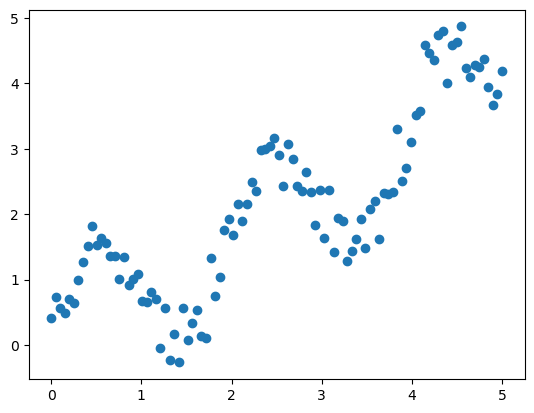

In [3]:
plt.scatter(x,y)

#### nonlinear

In [4]:
regr_lin = LinearRegression()

In [5]:
X = x.reshape(-1, 1)
print(X.shape)

(100, 1)


In [6]:
regr_lin.fit(X,y)

LinearRegression()

0.6002661001574415


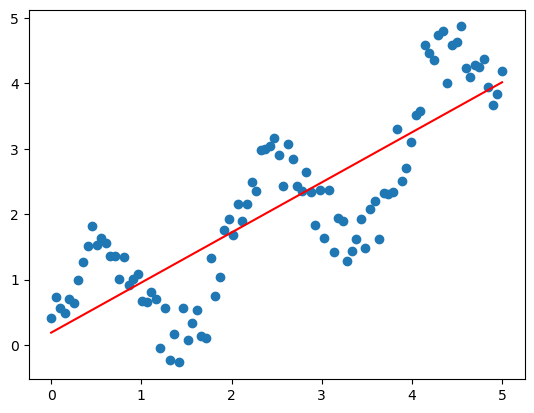

In [7]:
Y=regr_lin.predict(X)
plt.scatter(x,y)
plt.plot(x,Y , color='r')
mse = np.sum((Y-y)**2) / len(y)
print(mse)

果然超級不準, 該如何是好?

#### 多項式

多項式5次方

$$\widehat{y}=xw+b=w_{1}x_{1}+w_{2}x_{1}^{2}+w_{3}x_{1}^{3}+w_{4}x_{1}^{4}+w_{5}x_{1}^{5}+b$$

In [8]:
print(x.shape)

(100,)


In [9]:
X_poly = np.array([[k, k**2, k**3, k**4, k**5] for k in x])  # add k**6 to try it
print(X_poly.shape)

(100, 5)


In [10]:
regr_poly = LinearRegression()

In [11]:
regr_poly.fit(X_poly, y)

LinearRegression()

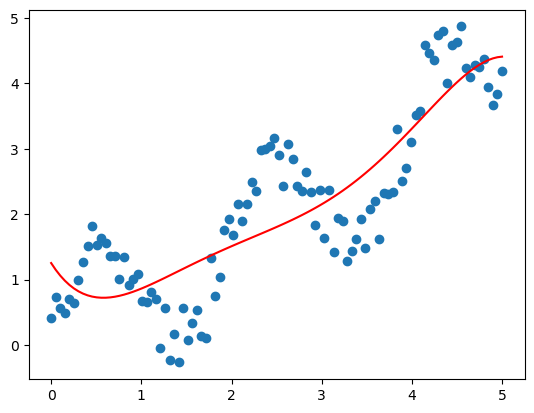

In [12]:
plt.scatter(x,y)
plt.plot(x, regr_poly.predict(X_poly), 'r')

In [13]:
print('Coefficients: ', regr_poly.coef_)
print('interception: ', regr_poly.intercept_)

Coefficients:  [-2.17729663  2.86082076 -1.33786025  0.28611257 -0.02210224]
interception:  1.2536109301621643


In [14]:
W=regr_poly.coef_
b=regr_poly.intercept_
np.dot(X_poly,W.T)+b

array([1.25361093, 1.15077322, 1.06152179, 0.98488844, 0.91994793,
       0.86581707, 0.82165387, 0.78665665, 0.76006319, 0.74114984,
       0.72923065, 0.7236565 , 0.72381426, 0.72912585, 0.73904744,
       0.75306853, 0.77071111, 0.79152876, 0.81510581, 0.84105642,
       0.86902377, 0.89867914, 0.92972108, 0.96187448, 0.99488976,
       1.02854196, 1.06262989, 1.09697523, 1.1314217 , 1.16583415,
       1.20009772, 1.23411692, 1.26781482, 1.30113215, 1.33402641,
       1.36647103, 1.39845448, 1.4299794 , 1.46106174, 1.49172987,
       1.52202372, 1.55199392, 1.58170089, 1.61121403, 1.64061078,
       1.6699758 , 1.69940006, 1.72898001, 1.75881667, 1.78901478,
       1.81968193, 1.85092767, 1.88286265, 1.91559776, 1.94924324,
       1.98390781, 2.01969781, 2.05671632, 2.0950623 , 2.13482969,
       2.17610658, 2.21897429, 2.26350655, 2.30976859, 2.35781627,
       2.40769525, 2.45944007, 2.51307328, 2.56860462, 2.62603009,
       2.68533111, 2.74647363, 2.8094073 , 2.87406452, 2.94035

記得這邊矩陣求解需要轉置

In [15]:
regr_poly.predict(X_poly)

array([1.25361093, 1.15077322, 1.06152179, 0.98488844, 0.91994793,
       0.86581707, 0.82165387, 0.78665665, 0.76006319, 0.74114984,
       0.72923065, 0.7236565 , 0.72381426, 0.72912585, 0.73904744,
       0.75306853, 0.77071111, 0.79152876, 0.81510581, 0.84105642,
       0.86902377, 0.89867914, 0.92972108, 0.96187448, 0.99488976,
       1.02854196, 1.06262989, 1.09697523, 1.1314217 , 1.16583415,
       1.20009772, 1.23411692, 1.26781482, 1.30113215, 1.33402641,
       1.36647103, 1.39845448, 1.4299794 , 1.46106174, 1.49172987,
       1.52202372, 1.55199392, 1.58170089, 1.61121403, 1.64061078,
       1.6699758 , 1.69940006, 1.72898001, 1.75881667, 1.78901478,
       1.81968193, 1.85092767, 1.88286265, 1.91559776, 1.94924324,
       1.98390781, 2.01969781, 2.05671632, 2.0950623 , 2.13482969,
       2.17610658, 2.21897429, 2.26350655, 2.30976859, 2.35781627,
       2.40769525, 2.45944007, 2.51307328, 2.56860462, 2.62603009,
       2.68533111, 2.74647363, 2.8094073 , 2.87406452, 2.94035

#### RBF

$$\phi_i = e^{-\| x - c_i \|^2/2\sigma^2}$$

In [16]:
# normal distrubution
def RBF(x, center, sigma):
    k = np.exp(-(x - center)**2/(2*sigma**2))
    return k

In [17]:
sigma = 0.3

In [18]:
X_rbf = np.array([[RBF(k, .5, sigma), 
                  RBF(k, 1.5, sigma),
                  RBF(k, 2.5, sigma),
                  RBF(k, 3.5, sigma),
                  RBF(k, 4.5, sigma)] for k in x])



In [19]:
regr_rbf = LinearRegression()

In [20]:
regr_rbf.fit(X_rbf, y)

LinearRegression()

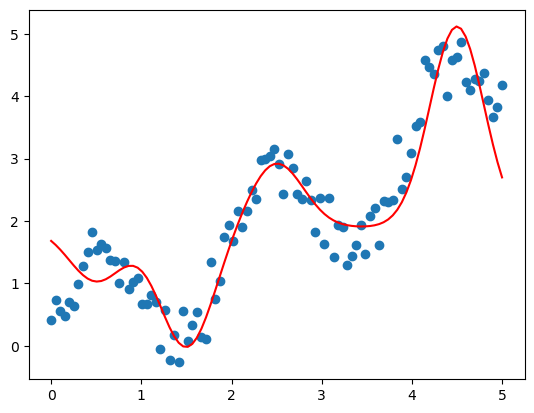

In [21]:
plt.scatter(x,y)
plt.plot(x, regr_rbf.predict(X_rbf), 'r')

In [22]:
print('Coefficients: ', regr_rbf.coef_)
print('interception: ', regr_rbf.intercept_)

Coefficients:  [-0.85720378 -1.91464963  1.031294    0.00356515  3.22041569]
interception:  1.895475678847825


#### Comparison

In [23]:
Y_lin = regr_lin.predict(X)
Y_poly = regr_poly.predict(X_poly)
Y_rbf = regr_rbf.predict(X_rbf)

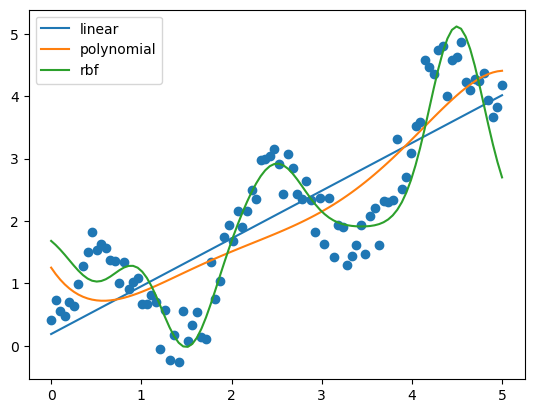

In [24]:
plt.scatter(x,y)

plt.plot(x, Y_lin, label='linear')
plt.plot(x, Y_poly, label='polynomial')
plt.plot(x, Y_rbf, label='rbf')
plt.legend()

## 請計算模型的MSE

In [25]:
print(np.sum((regr_lin.predict(X)-y)**2) / len(y))

0.6002661001574415


In [26]:
print(np.sum((regr_poly.predict(X_poly)-y)**2) / len(y))

0.5022521749306926


In [27]:
print(np.sum((regr_rbf.predict(X_rbf)-y)**2) / len(y))

0.23106378105452258
